In [ ]:
#importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression



**DATA PRE-PROCESSING AND CLEANING**

In [ ]:
#reading data into code

path='/content/Fish.csv'
df=pd.read_csv(path)
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
#describing the data

df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


**VISUALISATIONS**

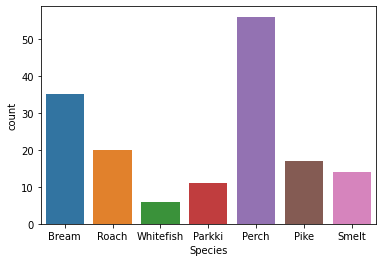

In [ ]:
#Plotting bar graph for the species and their counts

sns.countplot(x='Species',data=df)

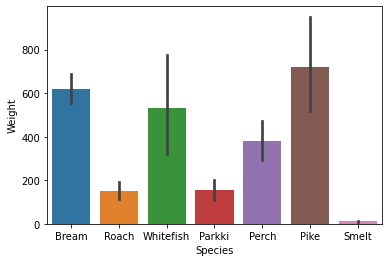

In [ ]:
#plotting the boxplot for species and their weights

sns.barplot(x='Species',y='Weight',data=df)

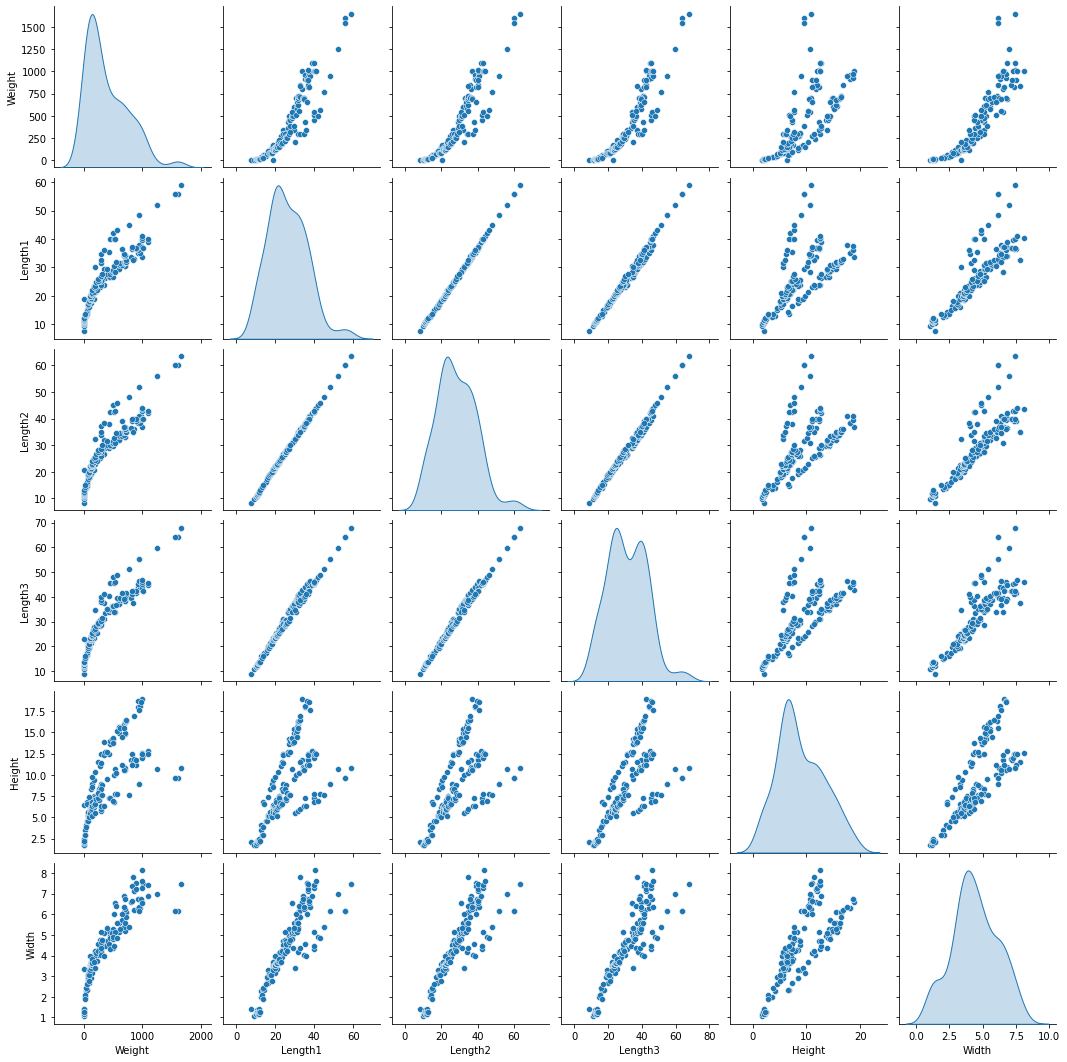

In [ ]:
#plotting scatter plots for all the attributes wrt each other

sns.pairplot(df[['Weight','Length1','Length2','Length3','Height','Width']],diag_kind='kde')

In [ ]:
#Determining correlation between the attributes wrt each other 

df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


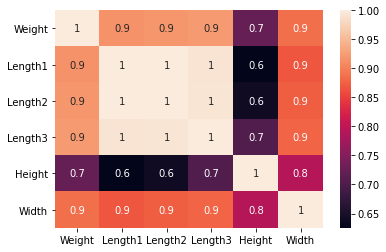

In [ ]:
#Plotting the correlation in the form of a heatmap

sns.heatmap(df.corr(),annot=True,fmt='.1g')

**MAKING THE MODEL**

In [ ]:
#getting dummy variables for the column 'Species '

df_dummy=pd.get_dummies(df, columns=['Species'])

In [ ]:
#previewing the dataset 

df_dummy.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [ ]:
#splitting into training and testing data

#target variable-Y axis 
Y=df_dummy['Weight'].values

#Independant variable- X axis
X=df_dummy.iloc[:,1:13].values

#Training and testinf data - dividing 70% data for training and 30% data for testing
X_train, X_val, Y_train, Y_val=train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
#model creation

model=LinearRegression()

#fitting the model
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#making predictions

predictions = model.predict(X_val)
predictions

array([ 397.95448408,  129.73611473,  209.04102524,  210.16019937,
        686.38064149,  872.32788233,  663.39415241,  419.50297878,
       1004.46289122,  142.00827627,  286.61124419,  525.68652152,
        719.58630018, 1017.54674762, -114.78767247,   26.88127378,
        163.9706359 ,  957.00081915,  182.99388776,  733.16938179,
       -103.66185149,  511.57632765,  168.02887639, 1126.05942468,
        -25.85713411,  477.0432793 ,  707.60331789,  240.51768894,
        888.25879301,   13.76772836,  585.88618243,  166.43036365,
        957.00081915,  343.15302525,  579.89225046,  270.64026817,
        377.03857408,  652.18899153,  707.90121252,  161.16410198,
        655.892628  ,  -98.43936493,  224.9093039 ,  755.54688342,
        145.87863781,  280.93851751,  230.81178722,  289.39592699])

In [ ]:
#checking actual weight

Y_val

array([ 390. ,    0. ,  170. ,  160. ,  556. ,  900. ,  800. ,  300. ,
        975. ,  115. ,  200. ,  456. , 1000. , 1000. ,   60. ,   78. ,
        145. , 1600. ,  130. ,  720. ,   55. ,  390. ,  120. , 1650. ,
         90. ,  450. ,  700. ,  270. ,  850. ,    9.7,  650. ,  110. ,
       1550. ,  300. ,  700. ,  225. ,  300. ,  620. ,  700. ,  135. ,
        514. ,   40. ,  145. ,  714. ,   19.7,  197. ,  180. ,  218. ])

**MULTI VARIATE REGRESSION : a+bX
where a is the intercept and b is the slope**

In [ ]:
#Calulating intercept 

intercept = model.intercept_
print(intercept)

-610.8708234671549


In [ ]:
#Evaluating the slope (b)

slopes = model.coef_
print(slopes)


[ -43.17190997   87.34557127  -34.17402514   55.70273928   52.98186653
 -178.14489619 -134.76554599    2.94547491   71.63504864   11.19638853
  327.47524195 -100.34171185]


In [ ]:
#printing the multi variate regression model 

reg_model = intercept, '+', slopes[0], '*Length 1+', slopes[1],'*Length 2 +',slopes[2],'*Length 3 +',slopes[3],'* Height +',slopes[4],'* Width +',slopes[5],'* Species_Bream +', slopes[6],'* Species_Parrki +',slopes[7],'* Species_Perch +',slopes[8],'* Species_Pike +',slopes[9],'* Species_Roach +',slopes[10],'* Species_Smelt +',slopes[11],'* Species_Whitefish'
print(reg_model)

(-610.8708234671549, '+', -43.17190996791924, '*Length 1+', 87.34557126842367, '*Length 2 +', -34.17402513985435, '*Length 3 +', 55.70273928000952, '* Height +', 52.98186652637341, '* Width +', -178.14489618592557, '* Species_Bream +', -134.7655459922459, '* Species_Parrki +', 2.9454749097039183, '* Species_Perch +', 71.63504863628907, '* Species_Pike +', 11.196388533192357, '* Species_Roach +', 327.47524194923005, '* Species_Smelt +', -100.34171185024415, '* Species_Whitefish')


**The regression model is : -610.8708234671544 + -43.17190996791997 *Length 1+ 87.3455712684239, *Length 2 + -34.17402513985393, *Length 3 +55.702739280009446, * Height + 52.98186652637338, * Width + -178.14489618592629, * Species_Bream + -134.76554599224585 * Species_Parrki + 2.9454749097041146, * Species_Perch + 71.63504863628923 * Species_Pike + 11.196388533192115 * Species_Roach + 327.4752419492306 * Species_Smelt + -100.34171185024402 * Species_Whitefish**

**MODEL EVALUATION**

In [ ]:
#calculating error

error=Y_val-predictions
print(error)

[  -7.95448408 -129.73611473  -39.04102524  -50.16019937 -130.38064149
   27.67211767  136.60584759 -119.50297878  -29.46289122  -27.00827627
  -86.61124419  -69.68652152  280.41369982  -17.54674762  174.78767247
   51.11872622  -18.9706359   642.99918085  -52.99388776  -13.16938179
  158.66185149 -121.57632765  -48.02887639  523.94057532  115.85713411
  -27.0432793    -7.60331789   29.48231106  -38.25879301   -4.06772836
   64.11381757  -56.43036365  592.99918085  -43.15302525  120.10774954
  -45.64026817  -77.03857408  -32.18899153   -7.90121252  -26.16410198
 -141.892628    138.43936493  -79.9093039   -41.54688342 -126.17863781
  -83.93851751  -50.81178722  -71.39592699]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


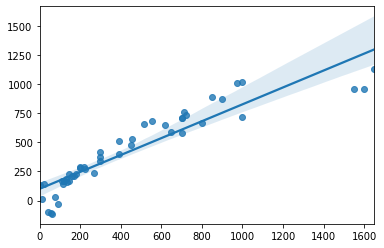

In [ ]:
# plotting  regression plot for actualy Y values (weight) and predicted values 

sns.regplot(Y_val, predictions)

In [ ]:
#determining accuracy of the model

accuracy = model.score(X_val, Y_val)
print('Accuracy of the model is', accuracy)

Accuracy of the model is 0.8315527837143382


**Final accuracy of the model is 83%.**